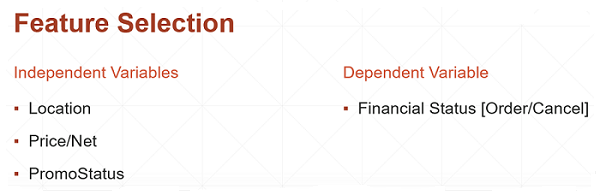

In [1]:
import sys
sys.argv[0] 

'c:\\users\\sysen\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\ipykernel_launcher.py'

In [ ]:
pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model

In [7]:
data_trained=pd.read_csv("./Data/Train_01.csv")
data_trained.shape

(5238, 19)

In [3]:
data_tested=pd.read_csv("./Data/Test_01.csv")
data_tested.shape

(1639, 19)

In [8]:
data_trained.head()

Name    Township    Location  Dstatus  Net  Lineitem price  \
0  #4221  UnknownTsp  UnknownLoc  Regular  0.0             NaN   
1  #4222  UnknownTsp  UnknownLoc  Regular  0.0             NaN   
2  #4223  UnknownTsp  UnknownLoc  Regular  0.0             NaN   
3  #4224  UnknownTsp  UnknownLoc  Regular  0.0             NaN   
4  #4226  UnknownTsp  UnknownLoc  Regular  0.0             NaN   

  Financial Status  OrdFreq       Date     Month  MonthNum Quarter Week  \
0            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
1            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
2            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
3            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
4            Order        1  4/24/2020  Apr_2020         4      Q2   W4   

  CategoryName SubCategory  Lineitem quantity  Discounted  Gross  Vendor  
0     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas  
1     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas  
2     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas  
3     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas  
4     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas

In [6]:
data_tested.head()

Name    Township    Location Dstatus    Net  Lineitem price  \
0  #27082  UnknownTsp  UnknownLoc   Promo   4000            4000   
1  #27082  UnknownTsp  UnknownLoc   Promo -18600            4000   
2  #27080  UnknownTsp  UnknownLoc   Promo   4000            4000   
3  #27104  UnknownTsp  UnknownLoc   Promo   4000            4000   
4  #27107  UnknownTsp  UnknownLoc   Promo   4000            4000   

  Financial Status  OrdFreq        Date     Month  MonthNum Quarter Week  \
0            Order        1  12/20/2020  Dec_2020        12      Q4   W3   
1            Order        1  12/20/2020  Dec_2020        12      Q4   W3   
2            Order        1  12/20/2020  Dec_2020        12      Q4   W3   
3            Order        1  12/21/2020  Dec_2020        12      Q4   W3   
4         Canceled        1  12/21/2020  Dec_2020        12      Q4   W3   

  CategoryName SubCategory  Lineitem quantity  Discounted  Gross Vendor  
0     FOOTWEAR       CLOGS                  1       -1000   4000  Crocs  
1     FOOTWEAR       CLOGS                  1       -1000   4000  Crocs  
2     FOOTWEAR       CLOGS                  1       -1000   4000  Crocs  
3     FOOTWEAR       CLOGS                  1       -1000   4000  Crocs  
4     FOOTWEAR       CLOGS                  1       -1000   4000  Crocs

In [9]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [10]:
report=pandas_profiling.ProfileReport(data_trained)

In [11]:
display(report)

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [14]:
data_trained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5238 entries, 0 to 5237
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5238 non-null   object 
 1   Township           5238 non-null   object 
 2   Location           5238 non-null   object 
 3   Dstatus            5238 non-null   object 
 4   Net                5238 non-null   float64
 5   Lineitem price     5171 non-null   float64
 6   Financial Status   5238 non-null   object 
 7   OrdFreq            5238 non-null   int64  
 8   Date               5238 non-null   object 
 9   Month              5238 non-null   object 
 10  MonthNum           5238 non-null   int64  
 11  Quarter            5238 non-null   object 
 12  Week               5238 non-null   object 
 13  CategoryName       5238 non-null   object 
 14  SubCategory        5238 non-null   object 
 15  Lineitem quantity  5238 non-null   int64  
 16  Discounted         5238 

In [15]:
import math
price_median=math.floor(data_trained[["Lineitem price"]].median())
price_median

32895

In [16]:
data_trained[["Lineitem price"]]=data_trained[["Lineitem price"]].fillna(price_median)
data_trained.head()

Name    Township    Location  Dstatus  Net  Lineitem price  \
0  #4221  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
1  #4222  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
2  #4223  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
3  #4224  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
4  #4226  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   

  Financial Status  OrdFreq       Date     Month  MonthNum Quarter Week  \
0            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
1            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
2            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
3            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
4            Order        1  4/24/2020  Apr_2020         4      Q2   W4   

  CategoryName SubCategory  Lineitem quantity  Discounted  Gross  Vendor  
0     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas  
1     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas  
2     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas  
3     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas  
4     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas

In [17]:
def trans_loc(x):
    if x=="UnknownLoc":
        return 0
    if x=="Other":
        return 1
    if x=="Yangon":
        return 2

In [18]:
def trans_dstatus(y):
    if y=="Regular":
        return 1
    if y=="Promo":
        return 2

In [19]:
def trans_financial(z):
    if z=="Order":
        return 1
    if z=="Canceled":
        return 0

In [20]:
data_trained["Location_Trans"]=data_trained["Location"].apply(trans_loc)
data_trained.head()

Name    Township    Location  Dstatus  Net  Lineitem price  \
0  #4221  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
1  #4222  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
2  #4223  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
3  #4224  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
4  #4226  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   

  Financial Status  OrdFreq       Date     Month  MonthNum Quarter Week  \
0            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
1            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
2            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
3            Order        1  4/24/2020  Apr_2020         4      Q2   W4   
4            Order        1  4/24/2020  Apr_2020         4      Q2   W4   

  CategoryName SubCategory  Lineitem quantity  Discounted  Gross  Vendor  \
0     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas   
1     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas   
2     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas   
3     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas   
4     FOOTWEAR    FOOTWEAR                  1         0.0    0.0  Adidas   

   Location_Trans  
0               0  
1               0  
2               0  
3               0  
4               0

In [21]:
data_tested["Location_Trans"]=data_tested["Location"].apply(trans_loc)
data_tested.head()

Name    Township    Location Dstatus    Net  Lineitem price  \
0  #27082  UnknownTsp  UnknownLoc   Promo   4000            4000   
1  #27082  UnknownTsp  UnknownLoc   Promo -18600            4000   
2  #27080  UnknownTsp  UnknownLoc   Promo   4000            4000   
3  #27104  UnknownTsp  UnknownLoc   Promo   4000            4000   
4  #27107  UnknownTsp  UnknownLoc   Promo   4000            4000   

  Financial Status  OrdFreq        Date     Month  MonthNum Quarter Week  \
0            Order        1  12/20/2020  Dec_2020        12      Q4   W3   
1            Order        1  12/20/2020  Dec_2020        12      Q4   W3   
2            Order        1  12/20/2020  Dec_2020        12      Q4   W3   
3            Order        1  12/21/2020  Dec_2020        12      Q4   W3   
4         Canceled        1  12/21/2020  Dec_2020        12      Q4   W3   

  CategoryName SubCategory  Lineitem quantity  Discounted  Gross Vendor  \
0     FOOTWEAR       CLOGS                  1       -1000   4000  Crocs   
1     FOOTWEAR       CLOGS                  1       -1000   4000  Crocs   
2     FOOTWEAR       CLOGS                  1       -1000   4000  Crocs   
3     FOOTWEAR       CLOGS                  1       -1000   4000  Crocs   
4     FOOTWEAR       CLOGS                  1       -1000   4000  Crocs   

   Location_Trans  
0               0  
1               0  
2               0  
3               0  
4               0

In [22]:
data_trained["DStatus_Trans"]=data_trained["Dstatus"].apply(trans_dstatus)
data_trained.head()

Name    Township    Location  Dstatus  Net  Lineitem price  \
0  #4221  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
1  #4222  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
2  #4223  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
3  #4224  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
4  #4226  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   

  Financial Status  OrdFreq       Date     Month  ...  Quarter Week  \
0            Order        1  4/24/2020  Apr_2020  ...       Q2   W4   
1            Order        1  4/24/2020  Apr_2020  ...       Q2   W4   
2            Order        1  4/24/2020  Apr_2020  ...       Q2   W4   
3            Order        1  4/24/2020  Apr_2020  ...       Q2   W4   
4            Order        1  4/24/2020  Apr_2020  ...       Q2   W4   

  CategoryName SubCategory Lineitem quantity  Discounted  Gross  Vendor  \
0     FOOTWEAR    FOOTWEAR                 1         0.0    0.0  Adidas   
1     FOOTWEAR    FOOTWEAR                 1         0.0    0.0  Adidas   
2     FOOTWEAR    FOOTWEAR                 1         0.0    0.0  Adidas   
3     FOOTWEAR    FOOTWEAR                 1         0.0    0.0  Adidas   
4     FOOTWEAR    FOOTWEAR                 1         0.0    0.0  Adidas   

  Location_Trans  DStatus_Trans  
0              0              1  
1              0              1  
2              0              1  
3              0              1  
4              0              1  

[5 rows x 21 columns]

In [23]:
data_tested["DStatus_Trans"]=data_tested["Dstatus"].apply(trans_dstatus)
data_tested.head()

Name    Township    Location Dstatus    Net  Lineitem price  \
0  #27082  UnknownTsp  UnknownLoc   Promo   4000            4000   
1  #27082  UnknownTsp  UnknownLoc   Promo -18600            4000   
2  #27080  UnknownTsp  UnknownLoc   Promo   4000            4000   
3  #27104  UnknownTsp  UnknownLoc   Promo   4000            4000   
4  #27107  UnknownTsp  UnknownLoc   Promo   4000            4000   

  Financial Status  OrdFreq        Date     Month  ...  Quarter Week  \
0            Order        1  12/20/2020  Dec_2020  ...       Q4   W3   
1            Order        1  12/20/2020  Dec_2020  ...       Q4   W3   
2            Order        1  12/20/2020  Dec_2020  ...       Q4   W3   
3            Order        1  12/21/2020  Dec_2020  ...       Q4   W3   
4         Canceled        1  12/21/2020  Dec_2020  ...       Q4   W3   

  CategoryName SubCategory Lineitem quantity  Discounted  Gross  Vendor  \
0     FOOTWEAR       CLOGS                 1       -1000   4000   Crocs   
1     FOOTWEAR       CLOGS                 1       -1000   4000   Crocs   
2     FOOTWEAR       CLOGS                 1       -1000   4000   Crocs   
3     FOOTWEAR       CLOGS                 1       -1000   4000   Crocs   
4     FOOTWEAR       CLOGS                 1       -1000   4000   Crocs   

  Location_Trans  DStatus_Trans  
0              0              2  
1              0              2  
2              0              2  
3              0              2  
4              0              2  

[5 rows x 21 columns]

In [24]:
data_trained["Financial_Trans"]=data_trained["Financial Status"].apply(trans_financial)
data_trained.head()

Name    Township    Location  Dstatus  Net  Lineitem price  \
0  #4221  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
1  #4222  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
2  #4223  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
3  #4224  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   
4  #4226  UnknownTsp  UnknownLoc  Regular  0.0         32895.0   

  Financial Status  OrdFreq       Date     Month  ...  Week CategoryName  \
0            Order        1  4/24/2020  Apr_2020  ...    W4     FOOTWEAR   
1            Order        1  4/24/2020  Apr_2020  ...    W4     FOOTWEAR   
2            Order        1  4/24/2020  Apr_2020  ...    W4     FOOTWEAR   
3            Order        1  4/24/2020  Apr_2020  ...    W4     FOOTWEAR   
4            Order        1  4/24/2020  Apr_2020  ...    W4     FOOTWEAR   

  SubCategory Lineitem quantity Discounted  Gross  Vendor  Location_Trans  \
0    FOOTWEAR                 1        0.0    0.0  Adidas               0   
1    FOOTWEAR                 1        0.0    0.0  Adidas               0   
2    FOOTWEAR                 1        0.0    0.0  Adidas               0   
3    FOOTWEAR                 1        0.0    0.0  Adidas               0   
4    FOOTWEAR                 1        0.0    0.0  Adidas               0   

  DStatus_Trans  Financial_Trans  
0             1                1  
1             1                1  
2             1                1  
3             1                1  
4             1                1  

[5 rows x 22 columns]

In [25]:
data_tested["Financial_Trans"]=data_tested["Financial Status"].apply(trans_financial)
data_tested.head()

Name    Township    Location Dstatus    Net  Lineitem price  \
0  #27082  UnknownTsp  UnknownLoc   Promo   4000            4000   
1  #27082  UnknownTsp  UnknownLoc   Promo -18600            4000   
2  #27080  UnknownTsp  UnknownLoc   Promo   4000            4000   
3  #27104  UnknownTsp  UnknownLoc   Promo   4000            4000   
4  #27107  UnknownTsp  UnknownLoc   Promo   4000            4000   

  Financial Status  OrdFreq        Date     Month  ...  Week CategoryName  \
0            Order        1  12/20/2020  Dec_2020  ...    W3     FOOTWEAR   
1            Order        1  12/20/2020  Dec_2020  ...    W3     FOOTWEAR   
2            Order        1  12/20/2020  Dec_2020  ...    W3     FOOTWEAR   
3            Order        1  12/21/2020  Dec_2020  ...    W3     FOOTWEAR   
4         Canceled        1  12/21/2020  Dec_2020  ...    W3     FOOTWEAR   

  SubCategory Lineitem quantity Discounted  Gross  Vendor  Location_Trans  \
0       CLOGS                 1      -1000   4000   Crocs               0   
1       CLOGS                 1      -1000   4000   Crocs               0   
2       CLOGS                 1      -1000   4000   Crocs               0   
3       CLOGS                 1      -1000   4000   Crocs               0   
4       CLOGS                 1      -1000   4000   Crocs               0   

  DStatus_Trans  Financial_Trans  
0             2                1  
1             2                1  
2             2                1  
3             2                1  
4             2                0  

[5 rows x 22 columns]

In [26]:
data_trainedC=data_trained.drop(["Lineitem quantity","CategoryName","SubCategory","Date","Month","MonthNum","Quarter","Week","Name","Township","Vendor","Gross","Discounted","Location","Dstatus","Net","Financial Status","OrdFreq"],axis="columns")
data_trainedC.head()

Lineitem price  Location_Trans  DStatus_Trans  Financial_Trans
0         32895.0               0              1                1
1         32895.0               0              1                1
2         32895.0               0              1                1
3         32895.0               0              1                1
4         32895.0               0              1                1

In [27]:
data_testedC=data_tested.drop(["Lineitem quantity","CategoryName","SubCategory","Date","Month","MonthNum","Quarter","Week","Name","Township","Vendor","Gross","Discounted","Location","Dstatus","Net","Financial Status","OrdFreq"],axis="columns")
data_testedC.head()

Lineitem price  Location_Trans  DStatus_Trans  Financial_Trans
0            4000               0              2                1
1            4000               0              2                1
2            4000               0              2                1
3            4000               0              2                1
4            4000               0              2                0

In [28]:
trained_missing=data_trainedC.isnull().sum()/data_trainedC.shape[0]*100
trained_missing

Lineitem price     0.0
Location_Trans     0.0
DStatus_Trans      0.0
Financial_Trans    0.0
dtype: float64

In [29]:
tested_missing=data_testedC.isnull().sum()/data_testedC.shape[0]*100
tested_missing

Lineitem price     0.0
Location_Trans     0.0
DStatus_Trans      0.0
Financial_Trans    0.0
dtype: float64

In [ ]:
#data_trainedC['Date']=pd.to_datetime(data_trainedC['Date'])
#data_trainedC.describe(include="all")

In [30]:
data_trainedC.groupby(["Location_Trans","DStatus_Trans","Financial_Trans"])["Location_Trans","DStatus_Trans","Financial_Trans"].agg("count")

<ipython-input-30-320af552c502>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_trainedC.groupby(["Location_Trans","DStatus_Trans","Financial_Trans"])["Location_Trans","DStatus_Trans","Financial_Trans"].agg("count")


Location_Trans  DStatus_Trans  \
Location_Trans DStatus_Trans Financial_Trans                                  
0              1             0                           330            330   
                             1                          1001           1001   
               2             0                           129            129   
                             1                           998            998   
1              1             0                           147            147   
                             1                           483            483   
               2             0                            41             41   
                             1                           320            320   
2              1             0                           148            148   
                             1                           810            810   
               2             0                           109            109   
                             1                           722            722   

                                              Financial_Trans  
Location_Trans DStatus_Trans Financial_Trans                   
0              1             0                            330  
                             1                           1001  
               2             0                            129  
                             1                            998  
1              1             0                            147  
                             1                            483  
               2             0                             41  
                             1                            320  
2              1             0                            148  
                             1                            810  
               2             0                            109  
                             1                            722

In [31]:
data_trainedC["Lineitem price"].describe()

count      5238.000000
mean      43962.088393
std       31719.934024
min        6450.000000
25%       25000.000000
50%       32895.000000
75%       53750.000000
max      292500.000000
Name: Lineitem price, dtype: float64

In [32]:
data_testedC["Lineitem price"].describe()

count      1639.000000
mean      43878.459426
std       25380.975680
min        4000.000000
25%       27930.000000
50%       44900.000000
75%       59910.000000
max      119900.000000
Name: Lineitem price, dtype: float64

In [ ]:
#data_trainedC=data_trainedC.drop_duplicates()
#data_trainedC.head()

In [33]:
reg=linear_model.LinearRegression()
reg.fit(data_trainedC[["Location_Trans","DStatus_Trans"]],data_trainedC[["Financial_Trans"]])

LinearRegression()

In [35]:
P=reg.predict(data_testedC[["Location_Trans","DStatus_Trans"]])
P

array([[0.8615522 ],
       [0.8615522 ],
       [0.8615522 ],
       ...,
       [0.76775121],
       [0.76775121],
       [0.76775121]])

In [36]:
data_testedC["Predict_Fi"]=P
data_testedC["Predict_Fi"]

0       0.861552
1       0.861552
2       0.861552
3       0.861552
4       0.861552
          ...   
1634    0.767751
1635    0.767751
1636    0.767751
1637    0.767751
1638    0.767751
Name: Predict_Fi, Length: 1639, dtype: float64

#### ***After Evaluation we can know these fatctors =>***

- Brand Consumers
- Promo Lovers
- Affordable Person

In [ ]:
data_testedC.to_csv("./Data/Predict_H01.csv")

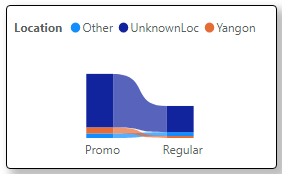

In [1]:
pip install nb_pdf_template

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
